# Introduction:
- Insurance claims fraud detection is a crucial area for insurers to manage, as fraudulent claims can lead to significant financial losses and operational inefficiencies. Here's an explanation of a typical case study involving insurance claims fraud detection
- The company collects a variety of data related to insurance claims, including:

1. Claim Details: Information about the claim such as the date of the claim, type of claim, amount claimed, and details of the incident.
2. Customer Information: Policyholder details including demographics, policy history, and previous claims.
3. Historical Claims Data: Past claims data, both legitimate and fraudulent, including outcomes and any patterns observed.
4. External Data: Data from third-party sources such as social media, public records, and industry databases.

- By leveraging advanced analytics and machine learning, the insurance company effectively combats claims fraud, reducing financial losses and improving operational efficiency. Continuous refinement and monitoring ensure the system adapts to new fraud patterns and remains a valuable tool for the company.

# Step 1: Import The key Libraries

In [254]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-claims-fraud-detection/Insurance_Claims_Fraud_vendor_data.csv
/kaggle/input/insurance-claims-fraud-detection/Insurance_Claims_Fraud_insurance_data.csv
/kaggle/input/insurance-claims-fraud-detection/Insurance_Claims_Fraud_employee_data.csv


In [256]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/colab/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# This Data Set Contains:
1. Employee Data- this the master data of the employee ( a.k.a agents or adjusters )
 working on the insurance claims
2. Vendor Data- this is the master data of the vendor who assist insurance company in
 investigating the claims
3. Claims Data- this is the claim level transaction details submitted by customer to the
 insurance company for reimbursement

# Step 2: Read the DataSet

In [259]:
insurance_df1 = pd.read_csv('/kaggle/input/insurance-claims-fraud-detection/Insurance_Claims_Fraud_employee_data.csv')
print("Full train dataset shape is {}".format(insurance_df1.shape))

Full train dataset shape is (1200, 10)


In [260]:
insurance_df2 = pd.read_csv('/kaggle/input/insurance-claims-fraud-detection/Insurance_Claims_Fraud_insurance_data.csv')
print("Full train dataset shape is {}".format(insurance_df2.shape))

Full train dataset shape is (10000, 38)


In [261]:
insurance_df3 = pd.read_csv('/kaggle/input/insurance-claims-fraud-detection/Insurance_Claims_Fraud_vendor_data.csv')
print("Full train dataset shape is {}".format(insurance_df3.shape))

Full train dataset shape is (600, 7)


# Step 3. Basic Data View / Exploration

In [262]:
print(insurance_df1.dtypes)
print(insurance_df2.dtypes)
print(insurance_df3.dtypes)

AGENT_ID              object
AGENT_NAME            object
DATE_OF_JOINING       object
ADDRESS_LINE1         object
ADDRESS_LINE2         object
CITY                  object
STATE                 object
POSTAL_CODE            int64
EMP_ROUTING_NUMBER     int64
EMP_ACCT_NUMBER       object
dtype: object
TXN_DATE_TIME                object
TRANSACTION_ID               object
CUSTOMER_ID                  object
POLICY_NUMBER                object
POLICY_EFF_DT                object
LOSS_DT                      object
REPORT_DT                    object
INSURANCE_TYPE               object
PREMIUM_AMOUNT              float64
CLAIM_AMOUNT                  int64
CUSTOMER_NAME                object
ADDRESS_LINE1                object
ADDRESS_LINE2                object
CITY                         object
STATE                        object
POSTAL_CODE                   int64
SSN                          object
MARITAL_STATUS               object
AGE                           int64
TENURE      

In [263]:
insurance_df1.sample(10)

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
171,AGENT00172,Sonia Barnhill,1992-10-21,4800 Huffman Road,NaN,Anchorage,AK,99516,129342571,EJIE95130382071153
115,AGENT00116,Christopher Allen,1998-04-21,11 Water Street,NaN,Holbrook,MA,2343,83739602,JZWU32952168308378
687,AGENT00688,Glenda Briney,1991-03-08,123 Villa View Court,NaN,Brentwood,TN,37027,28559119,MTTH95957536259621
1085,AGENT01086,Barbara Betancourt,2013-08-24,34 Belair Drive,NaN,Holbrook,MA,2343,106103775,EISG65894271513444
920,AGENT00921,Alex Erps,2014-03-04,11330 Elmore Road,NaN,Anchorage,AK,99516,127883184,EQSN81454242555709
531,AGENT00532,John Lester,2017-11-21,1275 South Holland Drive,NaN,Fayetteville,AR,72704,14984374,SKOQ30843505901458
258,AGENT00259,Jerome Chittenden,2012-09-04,1349 Burkhart Avenue,NaN,San Leandro,CA,94579,31327626,UGTS19286892131039
329,AGENT00330,Amy Ballance,2014-11-25,1304 Northern Hills Road,NaN,Norman,OK,73071,39529471,TQUV41896107081017
354,AGENT00355,Gilberte Emerson,2009-12-26,8293 Grayson Grove,NaN,Montgomery,AL,36117,108316382,YLRS87443467882327
862,AGENT00863,Sarah Brown,1996-06-08,5436 Dorbrandt Street,#APT 000002,Anchorage,AK,99518,21384158,OLBB33201159859153


In [264]:
insurance_df2.sample(10)

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
2098,2020-08-24 00:00:00,TXN00002099,A00002393,PLC00008372,2016-03-11,2020-08-13,2020-08-18,Health,199.45,1000,...,A,Minor Loss,NaN,0,1,KY,Louisville,4,AGENT00496,NaN
8693,2021-05-12 00:00:00,TXN00008694,A00005694,PLC00005859,2012-06-19,2021-05-07,2021-05-08,Motor,89.13,10000,...,A,Major Loss,NaN,0,0,OK,Oklahoma City,14,AGENT01119,VNDR00389
8933,2021-05-21 00:00:00,TXN00008934,A00008466,PLC00005996,2015-10-18,2021-05-02,2021-05-07,Property,125.74,19000,...,A,Total Loss,Ambulance,1,0,VT,Barre,18,AGENT00130,VNDR00106
7034,2021-03-05 00:00:00,TXN00007035,A00005173,PLC00007372,2017-06-29,2021-02-28,2021-03-01,Motor,103.95,1000,...,A,Major Loss,Police,1,0,FL,Panama City Beach,19,AGENT00257,VNDR00293
8609,2021-05-08 00:00:00,TXN00008610,A00000984,PLC00000621,2019-02-28,2021-05-01,2021-05-03,Travel,79.67,2000,...,A,Major Loss,Other,1,1,DC,Washington,18,AGENT00988,VNDR00478
3587,2020-10-24 00:00:00,TXN00003588,A00000943,PLC00000540,2011-11-11,2020-10-22,2020-10-22,Travel,56.87,2000,...,A,Major Loss,Ambulance,1,1,MD,Glen Burnie,20,AGENT00078,VNDR00364
9957,2021-06-29 00:00:00,TXN00009958,A00001653,PLC00009698,2017-08-27,2021-06-12,2021-06-17,Travel,81.28,4000,...,A,Major Loss,NaN,1,0,DC,Washington,1,AGENT00684,NaN
7183,2021-03-11 00:00:00,TXN00007184,A00004212,PLC00001100,2014-02-16,2021-02-27,2021-03-04,Property,85.08,24000,...,A,Minor Loss,NaN,0,0,DC,Washington,13,AGENT00823,VNDR00500
5117,2020-12-22 00:00:00,TXN00005118,A00009246,PLC00004684,2016-06-10,2020-12-21,2020-12-21,Mobile,10.71,500,...,A,Total Loss,Ambulance,1,1,GA,Savannah,14,AGENT00571,VNDR00154
4236,2020-11-19 00:00:00,TXN00004237,A00006260,PLC00008138,2019-11-30,2020-11-12,2020-11-14,Travel,57.33,1000,...,A,Minor Loss,Ambulance,0,1,OK,Del City,18,AGENT00506,VNDR00100


In [265]:
insurance_df3.sample(10)

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
224,VNDR00225,"Martinez, Jones and Frederick",2502 Adrienne Way,NaN,Louisville,KY,40216
506,VNDR00507,Green-Anderson,1734 Tamarack Street Northwest,NaN,Washington,DC,20012
264,VNDR00265,Sawyer-Pineda,65 Lowry Road,NaN,Falmouth,MA,2540
170,VNDR00171,"Franco, Watson and Murray",4024 Northwest 16th Street,NaN,Oklahoma City,OK,73107
584,VNDR00585,Solomon Ltd,1835 Pointer Lane,NaN,Fayetteville,AR,72701
561,VNDR00562,Stephens Group,8716 Astrid Avenue,NaN,Louisville,KY,40228
65,VNDR00066,Hart-Carpenter,266 South J Street,NaN,Livermore,CA,94550
455,VNDR00456,"Reyes, Joseph and Gutierrez",104 Bennington Street,NaN,Lawrence,MA,1841
81,VNDR00082,Barnes PLC,2409 Park Street,NaN,Selma,CA,93662
395,VNDR00396,Holmes-Herrera,6 Oak Street,NaN,Town of Rockingham,VT,5101


In [266]:
insurance_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


In [267]:
insurance_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

In [268]:
insurance_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  97 non-null     object
 4   CITY           594 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


# observations:
1. Missing values exist in df1, df2, df3
- df2 = 'ADDRESS_LINE2',
  'CITY',
  'CUSTOMER_EDUCATION_LEVEL',
  'AUTHORITY_CONTACTED',
  'INCIDENT_CITY',
  'VENDOR_ID'],
 [8505, 54, 529, 1945, 46, 3245])
 - df3 = (['ADDRESS_LINE2', 'CITY'], [503, 6])
 - df1 = (['ADDRESS_LINE2', 'CITY'], [1021, 7])

In [269]:
insurance_df1.head()

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,NaN,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,NaN,Panama City,FL,32404,67563771,ZANG21285355574581
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,NaN,Montgomery,AL,36110,114951317,DZFS82244494451134


In [270]:
insurance_df2.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [271]:
insurance_df3.head()

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703
1,VNDR00002,Garcia Ltd,5701 East Shirley Lane,NaN,Montgomery,AL,36117
2,VNDR00003,Cherry LLC,1217 Cottondale Road,NaN,Montgomery,AL,36109
3,VNDR00004,Mays-Benson,227 West Montgomery Cross Road,#736,Savannah,GA,31406
4,VNDR00005,Wilson PLC,23 North Hill Street,NaN,Nashville,TN,37210


# observation
- #  Find the Descriptive Statistics:
 - Calculate mean, median, and standard deviation of severity levels. And analyse it 

In [272]:
# Find the Descriptive Statistics
print("\nDataset  Descriptive Statistics:")
print(insurance_df1.describe())

# Find the Descriptive Statistics
print("\nDataset  Descriptive Statistics:")
print(insurance_df2.describe())

# Find the Descriptive Statistics
print("\nDataset  Descriptive Statistics:")
print(insurance_df3.describe())


Dataset  Descriptive Statistics:
        POSTAL_CODE  EMP_ROUTING_NUMBER
count   1200.000000        1.200000e+03
mean   50220.733333        7.098849e+07
std    33388.345995        3.446728e+07
min     1007.000000        1.002215e+07
25%    21103.500000        4.042720e+07
50%    37209.500000        7.252639e+07
75%    82510.250000        1.009398e+08
max    99577.000000        1.299226e+08

Dataset  Descriptive Statistics:
       PREMIUM_AMOUNT   CLAIM_AMOUNT   POSTAL_CODE           AGE  \
count    10000.000000   10000.000000  10000.000000  10000.000000   
mean        88.508595   16563.830000  48288.830500     44.466100   
std         48.315874   22037.489735  32467.389801     11.516827   
min          6.000000     100.000000   1001.000000     25.000000   
25%         62.015000    2000.000000  21061.000000     34.000000   
50%         88.835000    7000.000000  37206.000000     45.000000   
75%        121.902500   21000.000000  80004.000000     54.000000   
max        200.000000  10000

In [274]:
insurance_df1.replace('?', np.nan, inplace = True)

# step 4: Data preprocessing - clean

In [275]:
print(insurance_df1.columns)

print(insurance_df2.columns)

print(insurance_df3.columns)

Index(['AGENT_ID', 'AGENT_NAME', 'DATE_OF_JOINING', 'ADDRESS_LINE1',
       'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'EMP_ROUTING_NUMBER',
       'EMP_ACCT_NUMBER'],
      dtype='object')
Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1',
       'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID'],
      dtype='object')
Index(['VENDOR_ID', 'VENDOR_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CIT

In [276]:
insurance_df1.drop_duplicates(inplace=True)

In [277]:
insurance_df2.drop_duplicates(inplace=True)

In [279]:
insurance_df3.drop_duplicates(inplace=True)

In [280]:
insurance_df1.isnull().sum()

AGENT_ID                 0
AGENT_NAME               0
DATE_OF_JOINING          0
ADDRESS_LINE1            0
ADDRESS_LINE2         1021
CITY                     7
STATE                    0
POSTAL_CODE              0
EMP_ROUTING_NUMBER       0
EMP_ACCT_NUMBER          0
dtype: int64

In [281]:
insurance_df2.isnull().sum()

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2               8505
CITY                          54
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL     529
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_

In [282]:
insurance_df3.isnull().sum()

VENDOR_ID          0
VENDOR_NAME        0
ADDRESS_LINE1      0
ADDRESS_LINE2    503
CITY               6
STATE              0
POSTAL_CODE        0
dtype: int64

In [283]:
lst = list(insurance_df1.isnull().sum())
lst

[0, 0, 0, 0, 1021, 7, 0, 0, 0, 0]

In [284]:
cols = list(insurance_df1.columns)
cols

['AGENT_ID',
 'AGENT_NAME',
 'DATE_OF_JOINING',
 'ADDRESS_LINE1',
 'ADDRESS_LINE2',
 'CITY',
 'STATE',
 'POSTAL_CODE',
 'EMP_ROUTING_NUMBER',
 'EMP_ACCT_NUMBER']

In [286]:
missing_col = []
missing_rows = []
for i in range(len(lst)):
    if lst [i]> 0:
        missing_col.append(cols[i])
        missing_rows.append(lst[i])
missing_col, missing_rows

(['ADDRESS_LINE2', 'CITY'], [1021, 7])

# Missing value handling

# observation
- Here we solve missing values using this
- insurance_df1.ADDRESS_LINE2.fillna("Unknown", inplace=True)
- after this all values are equal

- # Missing values handlihg for insurance_df1

In [287]:
insurance_df1.ADDRESS_LINE2.fillna("Unknown", inplace=True)
insurance_df1.CITY.fillna("Unknown", inplace=True)

/tmp/ipykernel_36/4062224431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance_df1.ADDRESS_LINE2.fillna("Unknown", inplace=True)
/tmp/ipykernel_36/4062224431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [288]:
insurance_df1.isnull().sum()

AGENT_ID              0
AGENT_NAME            0
DATE_OF_JOINING       0
ADDRESS_LINE1         0
ADDRESS_LINE2         0
CITY                  0
STATE                 0
POSTAL_CODE           0
EMP_ROUTING_NUMBER    0
EMP_ACCT_NUMBER       0
dtype: int64

In [290]:
insurance_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       1200 non-null   object
 5   CITY                1200 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


- # Missing value handling for insurance_df2

In [291]:
lst = list(insurance_df2.isnull().sum())
lst

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8505,
 54,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 529,
 0,
 0,
 1945,
 0,
 0,
 0,
 46,
 0,
 0,
 3245]

In [292]:
cols = list(insurance_df2.columns)
cols

['TXN_DATE_TIME',
 'TRANSACTION_ID',
 'CUSTOMER_ID',
 'POLICY_NUMBER',
 'POLICY_EFF_DT',
 'LOSS_DT',
 'REPORT_DT',
 'INSURANCE_TYPE',
 'PREMIUM_AMOUNT',
 'CLAIM_AMOUNT',
 'CUSTOMER_NAME',
 'ADDRESS_LINE1',
 'ADDRESS_LINE2',
 'CITY',
 'STATE',
 'POSTAL_CODE',
 'SSN',
 'MARITAL_STATUS',
 'AGE',
 'TENURE',
 'EMPLOYMENT_STATUS',
 'NO_OF_FAMILY_MEMBERS',
 'RISK_SEGMENTATION',
 'HOUSE_TYPE',
 'SOCIAL_CLASS',
 'ROUTING_NUMBER',
 'ACCT_NUMBER',
 'CUSTOMER_EDUCATION_LEVEL',
 'CLAIM_STATUS',
 'INCIDENT_SEVERITY',
 'AUTHORITY_CONTACTED',
 'ANY_INJURY',
 'POLICE_REPORT_AVAILABLE',
 'INCIDENT_STATE',
 'INCIDENT_CITY',
 'INCIDENT_HOUR_OF_THE_DAY',
 'AGENT_ID',
 'VENDOR_ID']

In [293]:
missing_col = []
missing_rows = []
for i in range(len(lst)):
    if lst [i]> 0:
        missing_col.append(cols[i])
        missing_rows.append(lst[i])
missing_col, missing_rows

(['ADDRESS_LINE2',
  'CITY',
  'CUSTOMER_EDUCATION_LEVEL',
  'AUTHORITY_CONTACTED',
  'INCIDENT_CITY',
  'VENDOR_ID'],
 [8505, 54, 529, 1945, 46, 3245])

In [294]:
insurance_df2.ADDRESS_LINE2.fillna("Unknown", inplace=True)
insurance_df2.CITY.fillna("Unknown", inplace=True)
insurance_df2.CUSTOMER_EDUCATION_LEVEL.fillna("Unknown", inplace=True)
insurance_df2.AUTHORITY_CONTACTED.fillna("Unknown", inplace=True)
insurance_df2.INCIDENT_CITY.fillna("Unknown", inplace=True)
insurance_df2.VENDOR_ID.fillna("Unknown", inplace=True)

/tmp/ipykernel_36/3823606596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance_df2.ADDRESS_LINE2.fillna("Unknown", inplace=True)
/tmp/ipykernel_36/3823606596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [295]:
insurance_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             10000 non-null  object 
 13  CITY                      10000 non-null  object 
 14  STATE  

- # Missing value handling for insurance_df3

In [296]:
lst = list(insurance_df3.isnull().sum())
lst

[0, 0, 0, 503, 6, 0, 0]

In [297]:
cols = list(insurance_df3.columns)
cols

['VENDOR_ID',
 'VENDOR_NAME',
 'ADDRESS_LINE1',
 'ADDRESS_LINE2',
 'CITY',
 'STATE',
 'POSTAL_CODE']

In [298]:
missing_col = []
missing_rows = []
for i in range(len(lst)):
    if lst [i]> 0:
        missing_col.append(cols[i])
        missing_rows.append(lst[i])
missing_col, missing_rows

(['ADDRESS_LINE2', 'CITY'], [503, 6])

In [299]:
insurance_df3.ADDRESS_LINE2.fillna("Unknown", inplace=True)
insurance_df3.CITY.fillna("Unknown", inplace=True)

/tmp/ipykernel_36/1114929214.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance_df3.ADDRESS_LINE2.fillna("Unknown", inplace=True)
/tmp/ipykernel_36/1114929214.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [300]:
insurance_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  600 non-null    object
 4   CITY           600 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


In [301]:
print('insurance_df1 unique values:')
print(insurance_df1.nunique())

print('insurance_df2 unique values:')
print(insurance_df2.nunique())

print('insurance_df3 unique values:')
print(insurance_df3.nunique())

insurance_df1 unique values:
AGENT_ID              1200
AGENT_NAME            1198
DATE_OF_JOINING       1125
ADDRESS_LINE1         1002
ADDRESS_LINE2          115
CITY                   204
STATE                   16
POSTAL_CODE            361
EMP_ROUTING_NUMBER    1200
EMP_ACCT_NUMBER       1200
dtype: int64
insurance_df2 unique values:
TXN_DATE_TIME                 395
TRANSACTION_ID              10000
CUSTOMER_ID                 10000
POLICY_NUMBER               10000
POLICY_EFF_DT                3306
LOSS_DT                       414
REPORT_DT                     409
INSURANCE_TYPE                  6
PREMIUM_AMOUNT               6550
CLAIM_AMOUNT                  107
CUSTOMER_NAME                9880
ADDRESS_LINE1                3092
ADDRESS_LINE2                 257
CITY                          413
STATE                          16
POSTAL_CODE                   669
SSN                         10000
MARITAL_STATUS                  2
AGE                            40
TENURE       

# Step 5: EDA (Explorative Data Analytics)

- Conduct exploratory data analysis (EDA) to understand the dataset’s structure and identify key patterns and correlations.

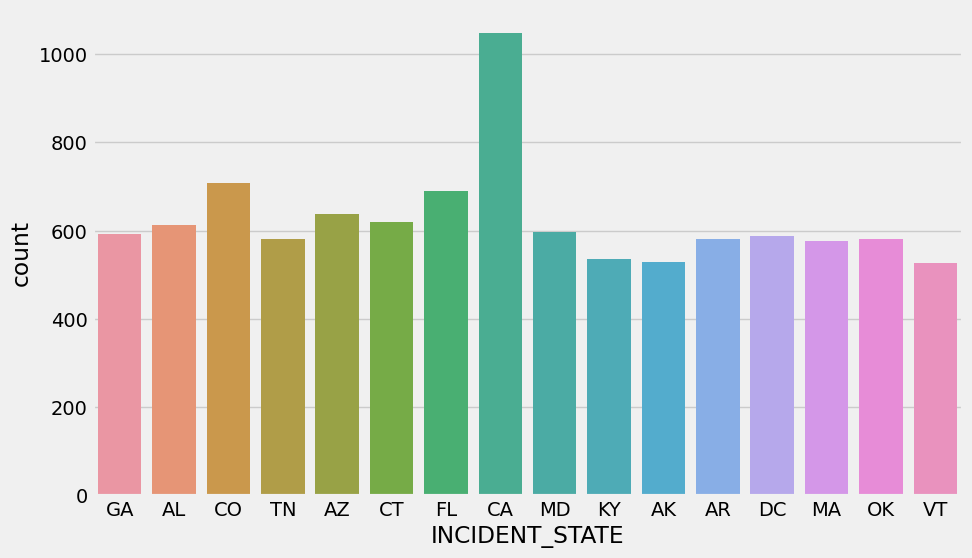

In [302]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='INCIDENT_STATE', data=insurance_df2)

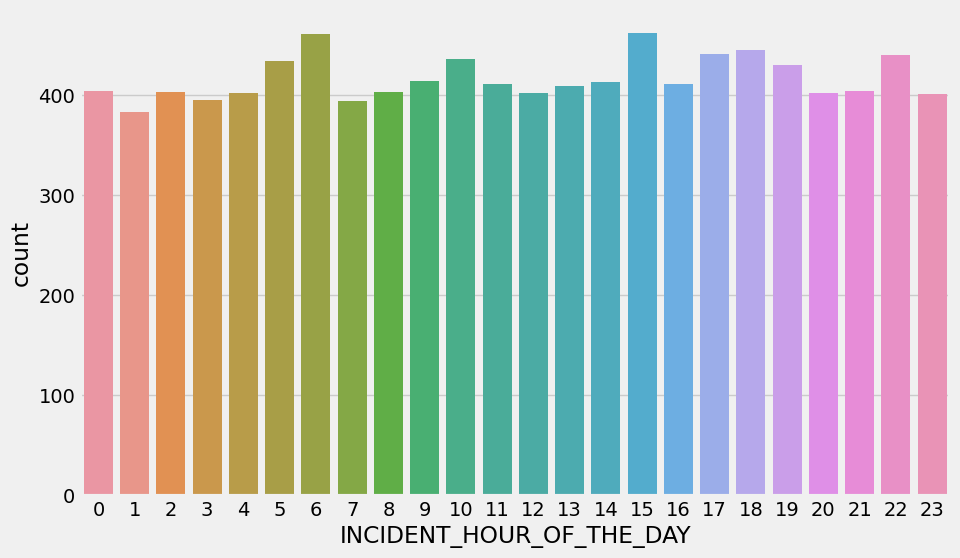

In [304]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='INCIDENT_HOUR_OF_THE_DAY', data=insurance_df2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


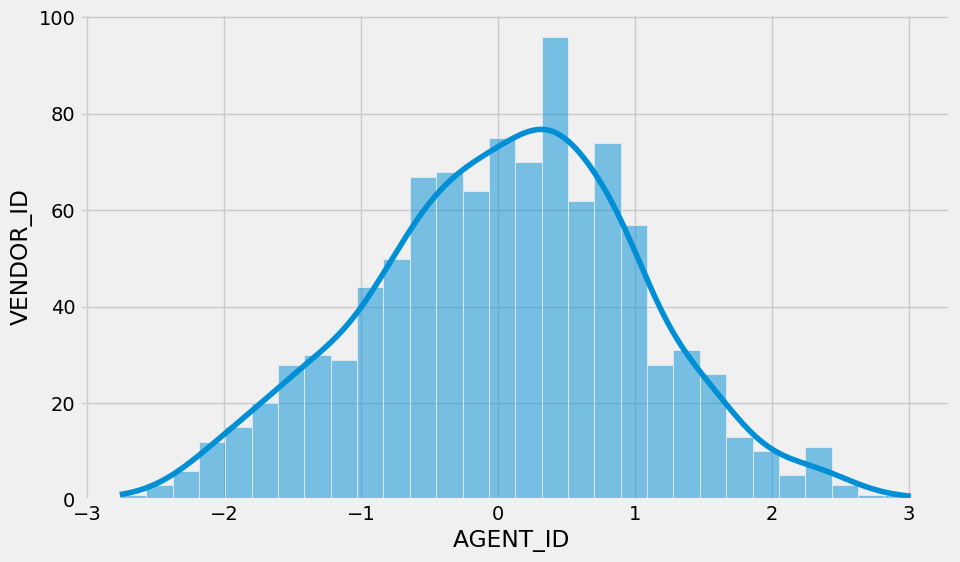

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
insurance_df2= np.random.randn(1000)  

# Create Histogram
plt.figure(figsize=(10, 6))
sns.histplot(insurance_df2 ,bins=30, kde=True)
plt.xlabel('AGENT_ID ')
plt.ylabel('VENDOR_ID')
plt.show()


- In this case study we checkk Emplyee data, Insurance data& Vender data
- a step-by-step guide to solving the use cases:
1. Data Preparation
2. Claim-Level Fraud Detection
3. Employee Fraud Detection
4. Employee-Vendor Collusion Detection
5. Implementation and Monitoring

